In [26]:
import darp
import Visualization
import darpinPoly
# import Visualization

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from numpy import random
from scipy.ndimage import convolve


In [28]:


# the O.S package make a directory is this a file, making a data directory
# pickle package native python object. Nice way to sve data, pickle.dump to file
# obstacle generation

# def covisiblity_calculation:

map = np.array([[1, 1, 1, 1, 0, 1, 1, 3, 3, 3],
 [1, 1, 1, 1, 0, 1, 1, 3, 3, 3],
 [1, 1, 1, 1, 0, 1, 1, 2, 2, 2],
 [1, 1, 0, 1, 0, 1, 1, 1, 2, 2],
 [1, 2, 0, 0, 0, 0, 1, 1, 2, 2],
 [1, 2, 0, 0, 0, 0, 1, 1, 2, 2],
 [1, 2, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 2, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


# Creates Binary Map Representation

obstacles = 1 #Binary indication of whether or not obstacles are present. Should be class object. 
number_of_robots = 3 # Equal to the amount of robots initialized. 
obstacle_indication = number_of_robots - obstacles + 1 # index starts at 0 for poses on map.
map_binary = np.where(map < obstacle_indication, 1, map)
map_binary = np.where(map_binary == obstacle_indication, 0, map_binary)
print("map_bianry")
print(map_binary)
print("")


# Alters Maps to be Stored

map_stored = np.where(map == obstacle_indication, -1, map) # If map has obstacles it replaces it with -1
print("\n")
print("map_stored")
print(map_stored)
print("\n")



# Creates Convolved Map

dilation_kernel = np.ones((3,3))*1/9
map_convolved = convolve(map, dilation_kernel)
edges_channel = map_convolved - map
binary_convolved = convolve(map_binary, dilation_kernel)
edges_binary = binary_convolved - map_binary
covisibility_score = abs(np.count_nonzero(edges_channel)) - abs(np.count_nonzero(edges_binary))
print("\n")
print("covisibility_score")
print(covisibility_score)
print("\n")




# Finally subtract the known number of borders surrounding the obstacles
# I think it would be for in map areas where there is a known border. We can make it smarter by running that scores
# if map has obstacles:
# perform convolution
# binary edge detection - subtract valuAA


print("\n")
print("map convolved")
print(map_convolved)







map_bianry
[[1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]



map_stored
[[ 1  1  1  1  0  1  1 -1 -1 -1]
 [ 1  1  1  1  0  1  1 -1 -1 -1]
 [ 1  1  1  1  0  1  1  2  2  2]
 [ 1  1  0  1  0  1  1  1  2  2]
 [ 1  2  0  0  0  0  1  1  2  2]
 [ 1  2  0  0  0  0  1  1  2  2]
 [ 1  2  0  0  1  1  1  1  1  1]
 [ 1  2  0  0  0  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]]




covisibility_score
28




map convolved
[[1 1 1 0 0 0 1 2 3 3]
 [1 1 1 0 0 0 1 2 2 2]
 [1 0 0 0 0 0 1 1 2 2]
 [1 0 0 0 0 0 1 1 1 2]
 [1 0 0 0 0 0 0 1 1 2]
 [1 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 1 1 1]
 [1 1 0 0 0 0 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


[27, 42, 57]
[27, 42, 57]
[(2, 7), (4, 2), (5, 7)]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 2. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 2. 1. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 2. 1. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


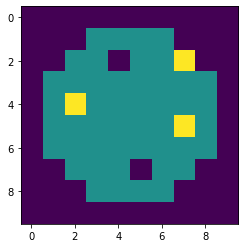

In [79]:
# Circle Gradient

# returns map that is circulized but also positions that need to be counted as an obstacle
# Circle Gradient
# returns map that is circulized but also positions that need to be counted as an obstacle
# def create_circular_mask(h, w, center=None, radius=None): 
# Outputs the map positions that are filled
# Randomly select radius before hand [3,4,5,6,7,8]
# Random Point 2 within inner radius

# Pickle Data


# Should it be 

def seed_positions(nrobots, obstacle_list, map):
    
    length = np.size(map)
    open_spots = np.arange(0, length, 1)
    open_spots = np.delete(open_spots, obstacle_list)
    seeds = rnd.sample(list(open_spots), nrobots)
    
    return seeds

def random_seed():

    #r = rnd.Random(500)
    # np.random.seed(r)
    # Map Shape or shoild w go with limited set
    
    radius_set = [3,4,5,6,7,8]
    #r.choice(radius_set)
    radius = rnd.choice(radius_set)

    return radius

def paint_map (map_im):
    
    
    plt.imshow(map_im)
    plt.show()

def openspots(map):
    w,h = map.shape
    pose = 0
    open_pose = []
    for i in range (w):
        for j in range (h):            
            index = map[i][j]
            if (index != -1):
                open_pose.append(pose)
            pose = pose + 1
    return open_pose

def filledspots(map):
    w,h = map.shape
    pose = 0
    filled_pose = []
    for i in range (w):
        for j in range (h):            
            index = map[i][j]
            if (index == -1):
                filled_pose.append(pose)
            pose = pose + 1
            
    return filled_pose


# Write in positions
def list_To_coords(coords, cols):
    cartesian = list(coords)
    cc_list = []
    print(cartesian)
    for position in cartesian:
        cc_list.append((position // cols, position % cols))
    return cc_list

def writespots(list, map, value):    
    
    w,h = map.shape
    binary_map = map
    for i in list:      
        index = np.unravel_index(i, (w,h), 'C')
        binary_map[index] = value
               
    return binary_map


def create_mask(h, w, center=None, radius=None):
    
    map = np.zeros((10,10))
    obstacle_map = np.zeros((10,10))

    # if((h*w)%2) == 0: # Run once where the center is the 4 and the other where it is the five. 
    if center is None: # use the middle of the image
        center = (float(w-1/2), float(h-1/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])     
        
    Y, X = np.ogrid[:h, :w]
    
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2) # change the sqrt to 4.5
    mask = dist_from_center <= radius
    obstacle_mask = dist_from_center <= (radius-1) # Smaller Radius to ensure that the obstacles not on edges

    circular = np.where(mask == False, -1, map)
    obstacle_map = np.where(mask == False, -1, obstacle_map)
    mask_list = filledspots(circular)

    
    # gets all poses that are open. 
    # random select two poses from openspots
    # random_obstacles = random.sample(openspots(obstacle_map), 2)
    # append the two list together
    random_obstacles = rnd.sample(openspots(obstacle_map), 2)    
    map_list = mask_list #+ random_obstacles
    obstacle_list = mask_list + random_obstacles
    
    return circular, map_list, random_obstacles, obstacle_list


# Generates Random Map along with the given obstacle list
h = 10
w = 10
radius = random_seed()
center = (float((h-1)/2), float((w-1)/2))
circular, map_list, random_obstacles, obstacle_list = create_mask(h,w, center, radius)

# Generates 3 list of initial poses. 
initial_poses = seed_positions(3, obstacle_list, map)
initial_positions = list(list_To_coords(initial_poses, h))
print(initial_poses)
print(initial_positions)

#Visualizer for generated Maps
map = writespots(obstacle_list, np.ones((h,w)), 0)
map = writespots(initial_poses, map, 2)
print(map)
paint_map(map)
    


#print("\n)")
#print(random_obstacles)
#print("\n)")
#print(map_list)
#print("\n)")
#print(obstacle_list)
# mask = create_circular_mask(10,10, center, 3)
# circular = np.where(mask == False, -1, map)
#print("\n")
#print(mask)
#print("\n")
#print(circular)

### https://newbedev.com/how-can-i-create-a-circular-mask-for-a-numpy-array

Basically you need and can try to make a larger bound for radius width. 

In [81]:
MaxIter = 80000
CCvariation = 0.01
randomLevel = 0.0001
dcells = 2

importance = False
notEqualPortions = False
visualization = False
portions = list(np.ones(len(initial_poses))*1/len(initial_poses))
obstacles_positions = list(list_To_coords(obstacle_list, h))
initial_positions = list(list_To_coords(initial_poses, h))

print("Intital Positions")
print(initial_positions)

nep = ""
vis = ""
poly = darpinPoly.DARPinPoly(h, w, MaxIter, CCvariation, randomLevel, dcells, importance, notEqualPortions, initial_positions, portions, obstacles_positions, visualization)

# print(poly.A)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 17, 18, 19, 20, 21, 28, 29, 30, 39, 40, 49, 50, 59, 60, 69, 70, 71, 78, 79, 80, 81, 82, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 24, 75]
[27, 42, 57]
Intital Positions
[(2, 7), (4, 2), (5, 7)]
Given Grid area:
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 1 1 1]
 [1 1 0 0 1 0 0 2 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 2 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 2 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 1 0 0 1 1]
 [1 1 1 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]

Final Assignment Matrix:
[[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 0. 0. 0. 0. 3. 3. 3.]
 [3. 3. 1. 0. 3. 0. 0. 0. 3. 3.]
 [3. 1. 1. 1. 0. 0. 0. 0. 0. 3.]
 [3. 1. 1. 1. 0. 0. 0. 2. 0. 3.]
 [3. 1. 1. 1. 1. 2. 2. 2. 2. 3.]
 [3. 1. 1. 1. 2. 2. 2. 2. 2. 3.]
 [3. 3. 1. 1. 2. 3. 2. 2. 3. 3.]
 [3. 3. 3. 1. 2. 2. 2. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]]

Results:

0 
Turns: [25, 20, 26]
Average: 23.667
Standard Deviation: 2.625

1 
Turns: [28, 20, 25]
Average: 24.333
Standard Deviation: 3.300

2 
Tu

In [ ]:
from time import time

def some_function():
    timeout = time.time() + 5
    while True:
        print("yo")
        if time.time() > timeout:
            break
        
some_function()
      

Error: Session cannot generate requests

In [ ]:
print("esg")

Error: Session cannot generate requests